In [1]:
#The magic starts here!
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#! pip install --upgrade seaborn

In [3]:
# IMPORT LIBS

In [4]:
import MDAnalysis
from MDAnalysis.analysis.dihedrals import Dihedral
import os as os
from numpy.linalg import norm
import math
import pandas as pd
import seaborn as sns


In [5]:
# for output saving the trajectories. But.. maybe we do not even need to save them. 

#out_root_path='/'
#trajectories_out_path='%s/trajectoriesCOM_K13/'%out_root_path

#if not os.path.isdir(trajectories_out_path):
#    print ("Generating out dir", trajectories_out_path)
#    os.mkdir(trajectories_out_path)

## DEFINE FUNCTIONS

In [6]:
def get_stacking_dataframe_ARG26(sidechain1, sidechain2):
    
    df = pd.DataFrame(columns = ['COM Dist', 'Dih Angle'])
    
    counter_p1=0
    counter_p2=0

    for ts in u.trajectory:
        #Let's first get the distance 
    
        A = sidechain1.center_of_mass()
        B = sidechain2.center_of_mass()
        dist=norm(A - B)
        
        a1 = u.select_atoms("name NH2 and resname ARG and resid 26").positions
        a2 = u.select_atoms("name NE and resname ARG and resid 26").positions
        a3 = u.select_atoms("name NH1 and resname ARG and resid 26").positions
        a4 = u.select_atoms("name C2 and resname G and resid 2505").positions
        R=MDAnalysis.lib.distances.calc_dihedrals(a1, a2, a3, a4)
        degs=degrees(R)
        
        df=df.append({'COM Dist' : dist, 'Dih Angle' : degs[0]}, ignore_index = True)
        
    
        if degs <= 110 and degs >= 70:
            if dist<=5.0:
                counter_p1 +=1
                
        if degs >= -110 and degs <= -70:
            if dist<=5.0:
                counter_p2 +=1
    
    print("Stacking %: "+ str((counter_p1+counter_p2)/u.trajectory.n_frames))
    print("My error %: "+ str((counter_p1)/u.trajectory.n_frames))

    
    return(df)
        
        

In [7]:
def load_trajs(run, trajectories_path, ref_struct_path):
    
    traj=trajectories_path+"run%d.xtc" % run
    ref_struct=ref_struct_path+"top%d.pdb" % run
    u=MDAnalysis.Universe(ref_struct, traj)

    #Define side chains 
    G2505_SIDE= u.select_atoms("(name C3 or name N3 or name C4 or name C5 or name C6 or name N1) and (resname G and resid 2505)")
    ARG26_SIDE= u.select_atoms("(name NH1 or name NE or name NH2) and (resname ARG and resid 26)")
    
    U2585_SIDE= u.select_atoms("(name N1 or name C6 or name C5 or name C4 or name N3 or name C2) and (resname U and resid 2585)")
    ILE25_SIDE= u.select_atoms("(name CB or name CG1 or name CG2 or name CD) and (resname ILE and resid 25)")
 
    return(u,G2505_SIDE,ARG26_SIDE)


In [8]:
def plot_stacking(df, systdict_run,outdir):

    sns.histplot(df, x="COM Dist",
                        y="Dih Angle").set(title=systdict_run)



    plt.vlines(5, 70, 110, colors='r')
    plt.vlines(3.2, 70, 110, colors='r')

    plt.hlines(70, 3.2, 5, colors='r')
    plt.hlines(110, 3.2, 5, colors='r')

    plt.vlines(5, -70, -110, colors='r')
    plt.vlines(3.2, -70, -110, colors='r')

    plt.hlines(-70, 3.2, 5, colors='r')
    plt.hlines(-110, 3.2, 5, colors='r')

    plt.xlim(2, 16)
    
    plt.savefig(outdir+systdict_run+'_R26stacking.pdf')
    plt.show()
    

## Load Data and Run Calculating Functions

In [9]:
trajectories_path='/Users/fatima/Stanford/70S/Trajectories/ALL/Within15CompleteTunnel/cat_rename_trajs/'
ref_struct_path=trajectories_path
outdir='/Users/fatima/Stanford/WritingSecM/STACKING_R26/'

In [10]:
systdict={0:'K13', 1:'N13', 2:'WT'}

In [11]:
run=0
u,G2505_SIDE,ARG26_SIDE=load_trajs(run, trajectories_path, ref_struct_path)

In [12]:
df=get_stacking_dataframe_ARG26(G2505_SIDE, ARG26_SIDE)

Stacking %: 0.0686626746506986
My error %: 0.05429141716566866


## Plot 

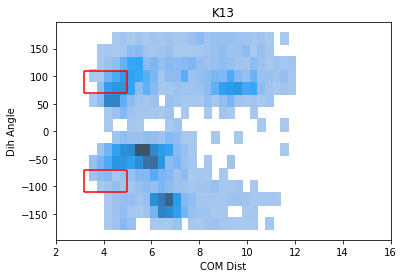

In [13]:
plot_stacking(df, systdict[run], outdir)

(0.0, 16.0)

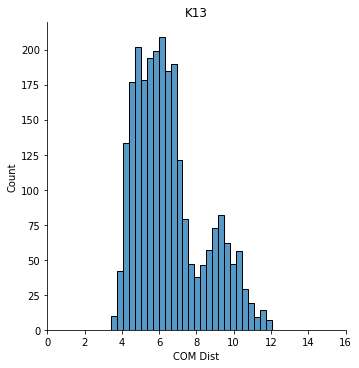

In [14]:
sns.displot(df["COM Dist"]).set(title=systdict[run])
plt.xlim(0, 16)


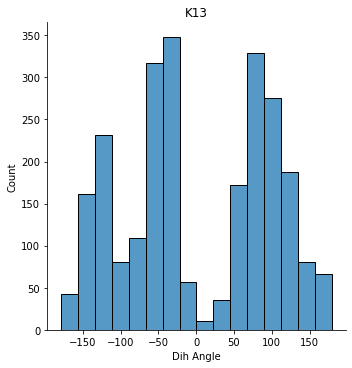

In [15]:
sns.displot(df["Dih Angle"]).set(title=systdict[run])